<a href="https://colab.research.google.com/github/Ghinaroo/kapsel-mlde/blob/main/skripsi_Ghina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install dysts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 MB 11.3 MB/s eta 0:00:00


In [2]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install nolds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46

In [5]:
import torch, numpy as np

# Kalau saya sukanya cek versi dan apakah PyTorch (atau tensorflow) sudah dapat mengakses GPU atau belum
print("Using Numpy and Pytorch versions = {}, {}".format(np.__version__, torch.__version__))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device, end=', ')
if device.type == 'cuda': #Additional Info when using cuda
    print(torch.cuda.get_device_name(0))
    print('Currently Memory Allocated, Cached =', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB, ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using Numpy and Pytorch versions = 1.22.4, 2.0.1+cu118
Using device: cuda, Tesla T4
Currently Memory Allocated, Cached = 0.0 GB,  0.0 GB


In [6]:
from dysts.datasets import load_dataset
import pandas as pd
import darts
import matplotlib.pyplot as plt
from darts.models import VARIMA
from darts.metrics import mape, smape, rmse
import warnings; warnings.simplefilter('ignore'); warnings.filterwarnings('ignore', module='darts'); warnings.filterwarnings('ignore', module='pandas')
import sys
from darts import metrics

np.random.seed(1)

In [7]:
data = 'LuChenCheng'
train_ = load_dataset(subsets="train", data_format="pandas", univariate=False).loc[data]
test_ = load_dataset(subsets="test", data_format="pandas", univariate=False).loc[data]

In [8]:
df = pd.concat([train_, test_], ignore_index=True) # , keys=["Train", "Test", "Validation"]
df.drop(['id'], axis=1, inplace=True)
df = df[['values_0']]#sol[['time', 'values_0']]
df.columns = ['x(t)']

df1 = pd.concat([train_, test_], ignore_index=True) # , keys=["Train", "Test", "Validation"]
df1.drop(['id'], axis=1, inplace=True)
df1 = df1[['values_1']]#sol[['time', 'values_0']]
df1.columns = ['y(t)']

df2 = pd.concat([train_, test_], ignore_index=True) # , keys=["Train", "Test", "Validation"]
df2.drop(['id'], axis=1, inplace=True)
df2 = df2[['values_2']]#sol[['time', 'values_0']]
df2.columns = ['z(t)']

In [9]:
df.head()

,x(t)
0,-0.513531
1,-0.486062
2,-0.458487
3,-0.430736
4,-0.402753


In [10]:
df1.head()

,y(t)
0,-0.666644
1,-0.645149
2,-0.624319
3,-0.604225
4,-0.584884


In [11]:
df2.head()

,z(t)
0,-0.736748
1,-0.765904
2,-0.794272
3,-0.821771
4,-0.848363


# exploratory data analys

In [12]:
(pd.concat([train_,test_],axis=0).reset_index()).describe()

,id,time,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8,values_9
count,2000.0,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,70.0,4.615880,-9.015011e-17,-2.824407e-16,9.947598e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,2.668313,1.000250e+00,1.000250e+00,1.000250e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,70.0,0.000000,-2.094771e+00,-1.999560e+00,-1.248107e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,70.0,2.307940,-7.008876e-01,-5.514910e-01,-8.452318e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,70.0,4.615880,-5.906726e-02,-2.493317e-01,-2.558231e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,70.0,6.923820,7.728969e-01,4.751171e-01,7.085868e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,70.0,9.231760,2.154137e+00,3.145124e+00,3.136160e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

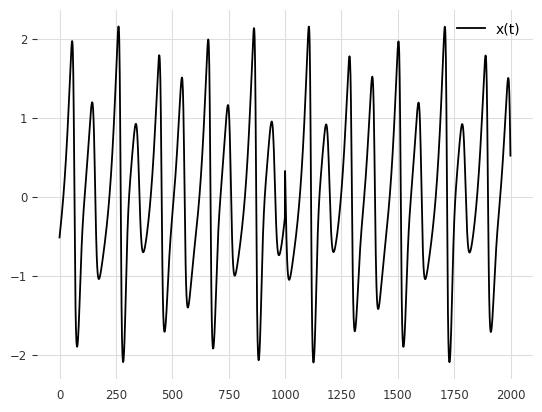

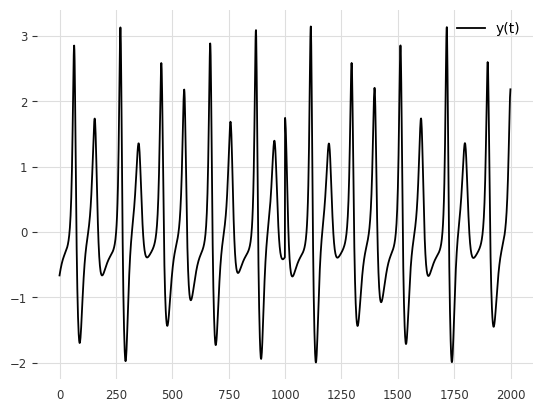

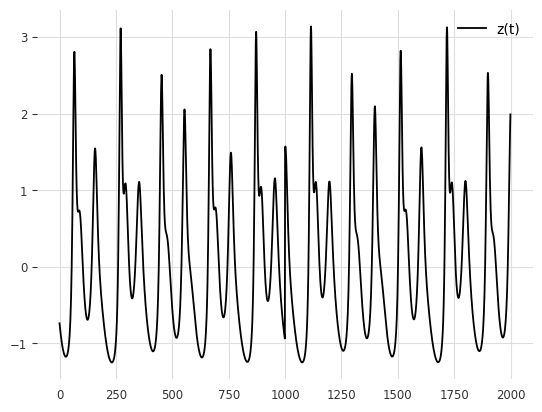

In [13]:
df.plot()
df1.plot()
df2.plot()


In [14]:
import statsmodels.api as sm

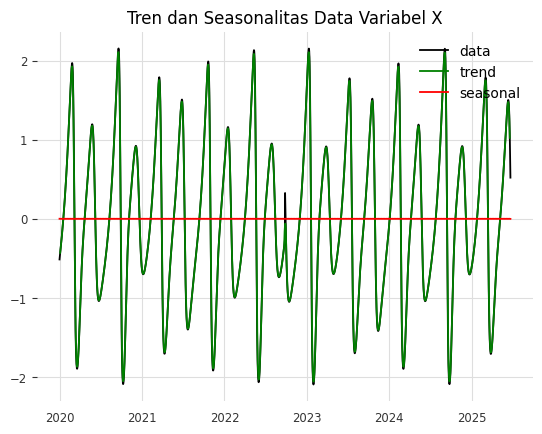

In [15]:
series_x = list(pd.concat([train_['values_0'], test_['values_0']], ignore_index=True))
date_rng = pd.date_range(start='1/1/2020', periods=2000)
series_x = pd.DataFrame(series_x, index=date_rng)
decomposition = sm.tsa.seasonal_decompose(series_x, model='additive')

plt.title('Tren dan Seasonalitas Data Variabel X')
plt.plot(series_x, label='data')
plt.plot(decomposition.trend, color='green', label='trend')
plt.plot(decomposition.seasonal, color='red', label='seasonal')
plt.legend(loc='upper right')
plt.show()

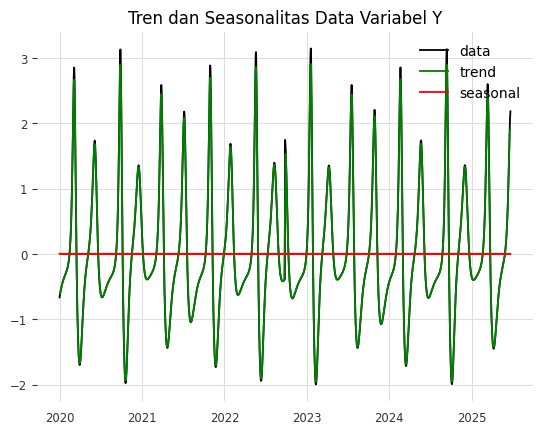

In [16]:
series_y = list(pd.concat([train_['values_1'], test_['values_1']], ignore_index=True))
date_rng = pd.date_range(start='1/1/2020', periods=2000)
series_y = pd.DataFrame(series_y, index=date_rng)
decomposition = sm.tsa.seasonal_decompose(series_y, model='additive')

plt.title('Tren dan Seasonalitas Data Variabel Y')
plt.plot(series_y, label='data')
plt.plot(decomposition.trend, color='green', label='trend')
plt.plot(decomposition.seasonal, color='red', label='seasonal')
plt.legend(loc='upper right')
plt.show()

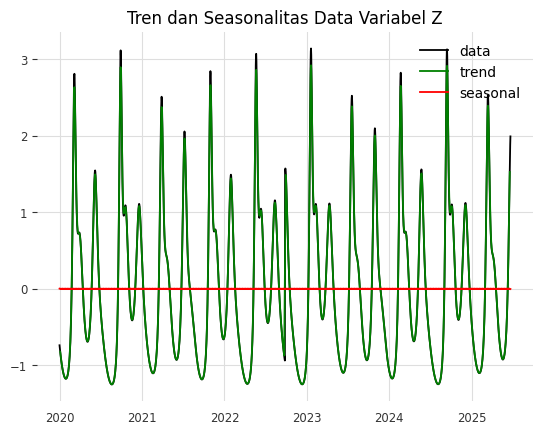

In [17]:

series_z = list(pd.concat([train_['values_2'], test_['values_2']], ignore_index=True))
date_rng = pd.date_range(start='1/1/2020', periods=2000)
series_z = pd.DataFrame(series_z, index=date_rng)
decomposition = sm.tsa.seasonal_decompose(series_z, model='additive')

plt.title('Tren dan Seasonalitas Data Variabel Z')
plt.plot(series_z, label='data')
plt.plot(decomposition.trend, color='green', label='trend')
plt.plot(decomposition.seasonal, color='red', label='seasonal')
plt.legend(loc='upper right')
plt.show()

In [18]:
result = sm.tsa.adfuller(series_x)
# Menampilkan hasil uji ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -9.628630151510995
p-value: 1.6347949255309984e-16
Critical Values:
1%: -3.433643643742798
5%: -2.862994949652858
10%: -2.5675445538118042


In [19]:
result = sm.tsa.adfuller(series_y)
# Menampilkan hasil uji ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -9.061306954973865
p-value: 4.555284459654719e-15
Critical Values:
1%: -3.4336386745240652
5%: -2.8629927557359443
10%: -2.5675433856598793


In [20]:
result = sm.tsa.adfuller(series_z)
# Menampilkan hasil uji ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -7.804697192359927
p-value: 7.334470072453111e-12
Critical Values:
1%: -3.4336502927748587
5%: -2.8629978852039737
10%: -2.5675461168480913


**nolds**

In [21]:
import numpy as np
import nolds
largest_lyap_0 = nolds.lyap_r(train_['values_0'])
largest_lyap_1 = nolds.lyap_r(train_['values_1'])
largest_lyap_2 = nolds.lyap_r(train_['values_2'])

entro_a = nolds.sampen(train_['values_0'])
entro_b = nolds.sampen(train_['values_1'])
entro_c = nolds.sampen(train_['values_2'])

print("lyapunov",largest_lyap_0,largest_lyap_1,largest_lyap_2)
print("entrophy",entro_a, entro_b, entro_c)

lyapunov 0.007181142595477578 0.006362944886200407 0.005130320294459058
entrophy 0.16088163599948935 0.1322745386104411 0.15047593215550129


**split data becoming data train and test**

In [22]:
series = darts.TimeSeries.from_dataframe(df, time_col=None, value_cols='x(t)')
series2 = darts.TimeSeries.from_dataframe(df1, time_col=None, value_cols='y(t)')
series3 = darts.TimeSeries.from_dataframe(df2, time_col=None, value_cols='z(t)')

In [23]:
series_stacked = series.stack(series2)
all = series_stacked.stack(series3)

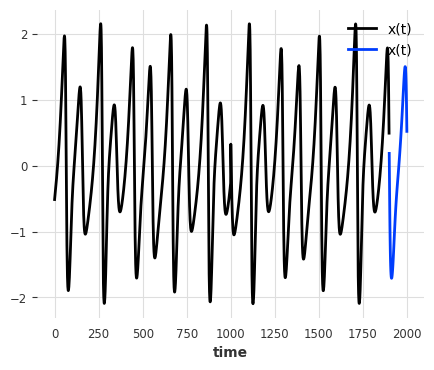

In [24]:
train, test = all.split_before(0.95) #95%
plt.figure(figsize=(5,4))
train['x(t)'].plot()
test['x(t)'].plot()

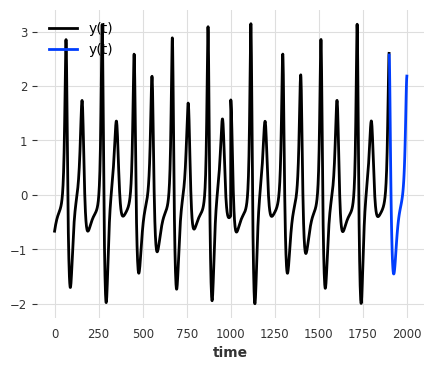

In [25]:
plt.figure(figsize=(5,4))
train['y(t)'].plot()
test['y(t)'].plot()

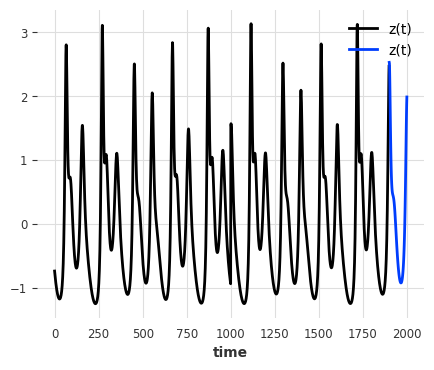

In [26]:
plt.figure(figsize=(5,4))
train['z(t)'].plot()
test['z(t)'].plot()

**model train and validation with data train using grid search**

In [27]:
def VAR(data, model, pVal=0.05, n_jobs=1, verbose_=False, metric_='smape'):

    parameters = {
        #"p": list(range(1, 6)),
        "p": [1,2,3,4,5],
        "d" : [0],
        "q" : [0,3],
        #"random_state":[SEED],
    }

    train, val = data.split_after(1-pVal)
    res = model.gridsearch(
        parameters=parameters,
        series=train,
        val_series=val,
        start=0.1,  # starting point in training set
        last_points_only=False,
        metric=getattr(metrics, metric_),
        reduction=np.mean,
        n_jobs=n_jobs,
        n_random_samples=None,# 0.99 % of full search space to evaluate
        verbose=verbose_,
    )
    return res

In [28]:
model, bestparams, bestMetric_ = VAR(train, VARIMA)
print("BestParameters", bestparams)
print("bestMetric_", bestMetric_)
# ===================== Training, Forecast & BackTest for Cross Validation=============================
print("GridSearch Finished,Training Best Model ... ", flush=True)
model.fit(train)
forecast_ = model.predict(len(test))
smape_ = darts.metrics.smape(test, forecast_)
rmse_ = darts.metrics.rmse(test, forecast_)
print("Pada data test RMSE={}, sMAPE={} ".format(rmse_, smape_), flush=True)

BestParameters {'p': 5, 'd': 0, 'q': 0}
bestMetric_ 80.08438068742714
GridSearch Finished,Training Best Model ... 
Pada data test RMSE=0.5631268810943064, sMAPE=79.95051843716517 


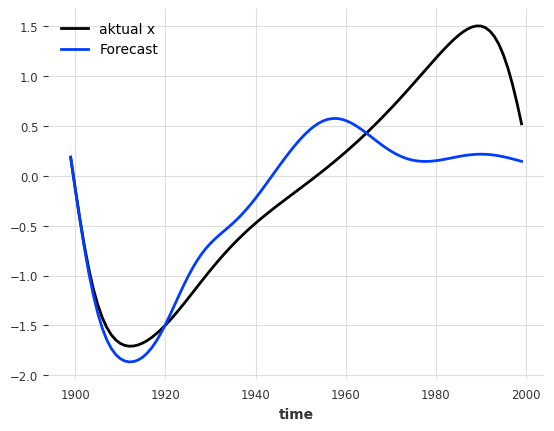

In [29]:
test['x(t)'].plot(label='aktual x')

forecast_['x(t)'].plot(label='Forecast')
plt.show()

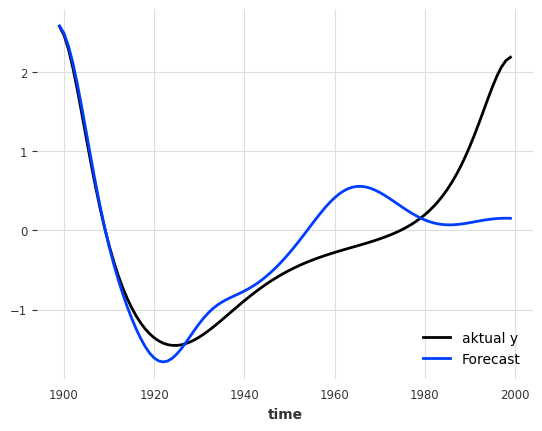

In [30]:
test['y(t)'].plot(label='aktual y')
forecast_['y(t)'].plot(label='Forecast')
plt.show()

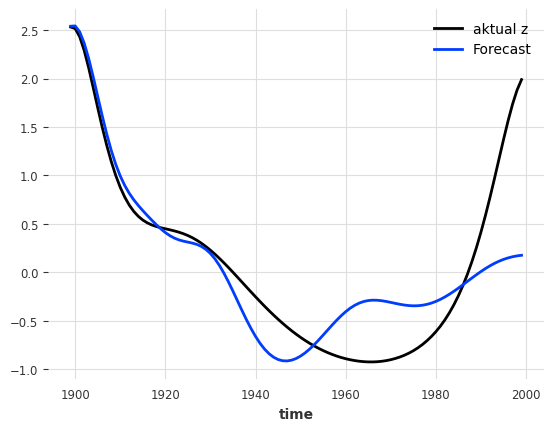

In [31]:
test['z(t)'].plot(label='aktual z')

forecast_['z(t)'].plot(label='Forecast')
plt.show()

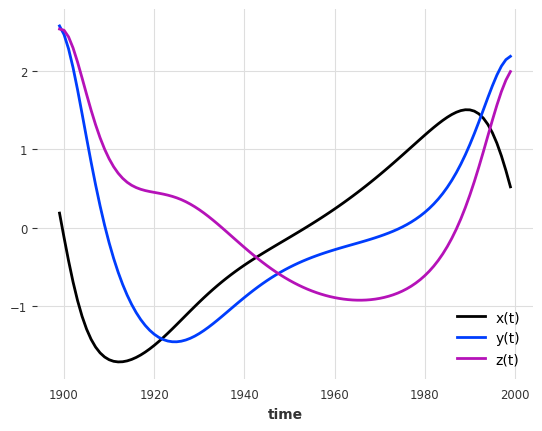

In [32]:
test.plot()

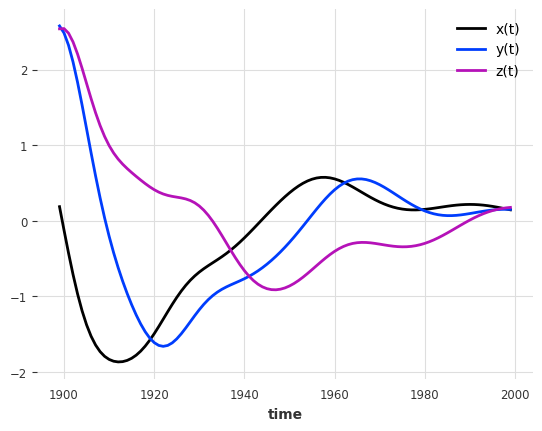

In [33]:
forecast_.plot()

In [43]:
error = []

for i in range(1,6):
  percent = i/100
  forecast = model.predict(int(percent*len(all)))
  if i == 5:
    mape = darts.metrics.smape(test, forecast)
  else:
    mape = darts.metrics.smape(test[:len(forecast)], forecast)
  error.append(mape)
  print("Prediksi test dengan {}% langkah, MAPE={} ".format(i, mape), flush=True)

Prediksi test dengan 1% langkah, MAPE=7.887629006726603 
Prediksi test dengan 2% langkah, MAPE=20.972336174479178 
Prediksi test dengan 3% langkah, MAPE=46.03060656649391 
Prediksi test dengan 4% langkah, MAPE=64.48304273894173 
Prediksi test dengan 5% langkah, MAPE=79.23550322349895 


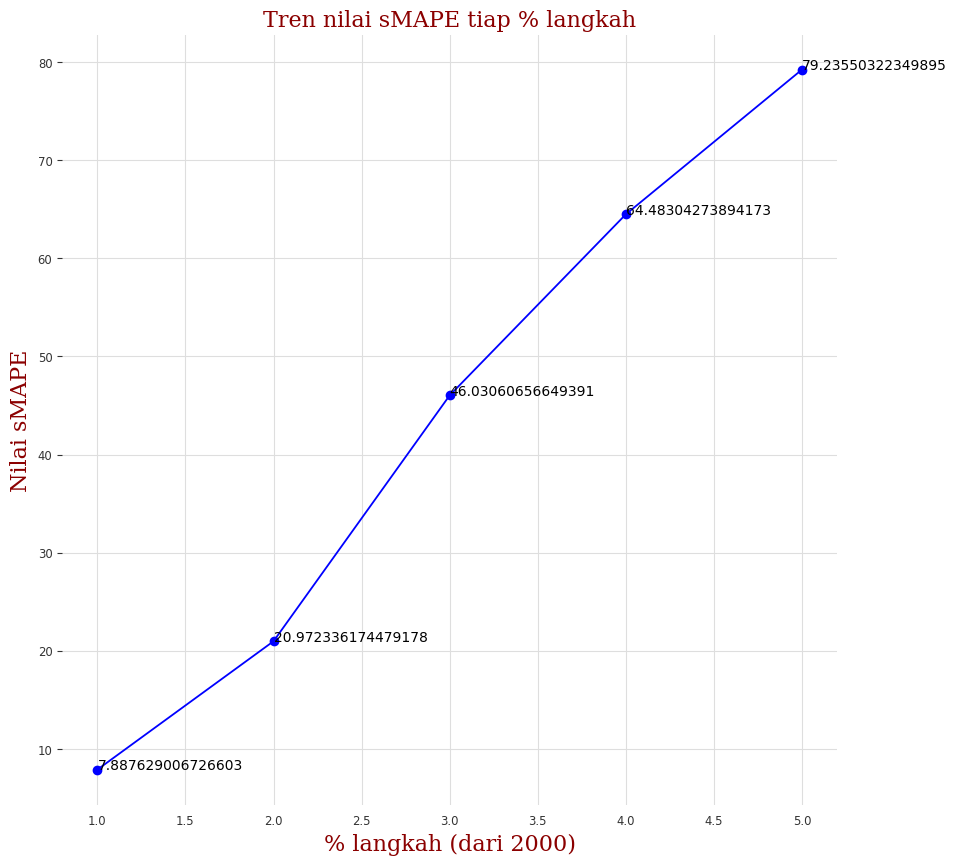

In [45]:
x=list(range(1,6))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

def addlabels(x,y):
    for i in range(1,6):
        plt.text(i, y[i-1], y[i-1], ha = 'left')

plt.figure(figsize = (10, 10))
plt.plot(x, error, marker='o', color='blue', label='error trend')
addlabels(x, error)
plt.title('Tren nilai sMAPE tiap % langkah', fontdict=font)
plt.xlabel('% langkah (dari 2000)', fontdict=font)
plt.ylabel('Nilai sMAPE', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.show()

In [46]:
error = []

for i in range(1,6):
  percent = i/100
  forecast = model.predict(int(percent*len(all)))
  if i == 5:
    rmse = darts.metrics.rmse(test, forecast)
  else:
    rmse = darts.metrics.rmse(test[:len(forecast)], forecast)
  error.append(rmse)
  print("Prediksi test dengan {}% langkah, RMSE={} ".format(i, rmse), flush=True)

Prediksi test dengan 1% langkah, RMSE=0.1013833815904489 
Prediksi test dengan 2% langkah, RMSE=0.1460945092205026 
Prediksi test dengan 3% langkah, RMSE=0.2340437496148714 
Prediksi test dengan 4% langkah, RMSE=0.34164479340399295 
Prediksi test dengan 5% langkah, RMSE=0.5424349209914957 


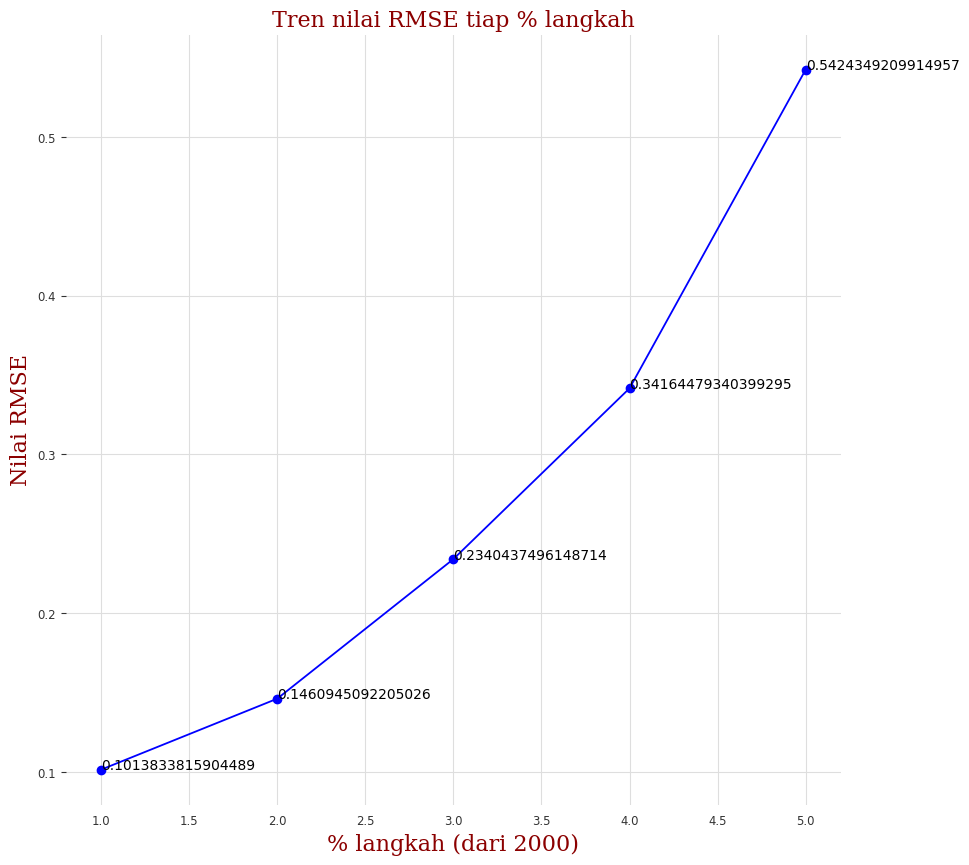

In [47]:
x=list(range(1,6))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

def addlabels(x,y):
    for i in range(1,6):
        plt.text(i, y[i-1], y[i-1], ha = 'left')

plt.figure(figsize = (10, 10))
plt.plot(x, error, marker='o', color='blue', label='error trend')
addlabels(x, error)
plt.title('Tren nilai RMSE tiap % langkah', fontdict=font)
plt.xlabel('% langkah (dari 2000)', fontdict=font)
plt.ylabel('Nilai RMSE', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.show()

In [48]:
LT = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,100]
list_sen_smape= []
list_sen_rmse = []

for l in LT :
  model, bestparams, bestMetric_ = VAR(train, VARIMA)

  model.fit(train)
  forecast_ = model.predict(l)
  smape_ = darts.metrics.smape(test, forecast_)
  list_sen_smape.append(smape_)
  rmse_ = darts.metrics.rmse(test, forecast_)
  list_sen_rmse.append(rmse_)

  del model

In [49]:
list_sen_smape

[0.2801356897010676,
 2.1106807192683767,
 4.675248542564121,
 6.823483769786442,
 7.887629006726603,
 8.58473052078144,
 9.65197382306236,
 13.726860093171629,
 20.972336174479178,
 25.943989089752566,
 32.5068845597159,
 38.65834065628889,
 46.03060656649391,
 51.34088393845175,
 55.61719848422015,
 60.76148239173518,
 64.48304273894173,
 66.39478703286302,
 79.23550322349895]

In [50]:
list_sen_rmse

[0.0053194904081666034,
 0.042892400586277545,
 0.07436632184881369,
 0.08723862077911347,
 0.1013833815904489,
 0.1113214185712053,
 0.11819315377624906,
 0.12853204379355368,
 0.1460945092205026,
 0.17024771277232661,
 0.18996130483084084,
 0.2068697916175897,
 0.2340437496148714,
 0.27059419453167516,
 0.30015876694298355,
 0.32155691065885145,
 0.34164479340399295,
 0.3638372275503219,
 0.5424349209914957]

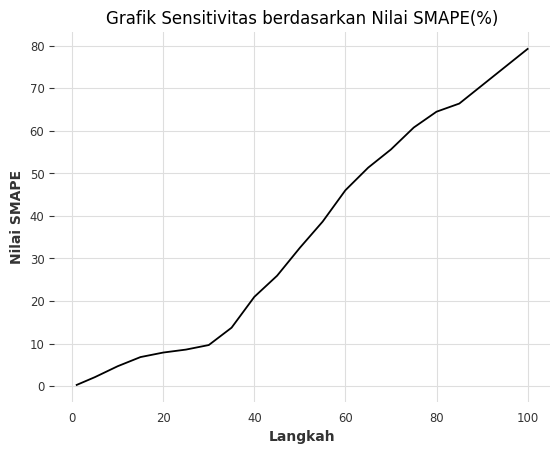

In [53]:
# plotting the points
plt.plot(LT, list_sen_smape)


# naming the x axis
plt.xlabel('Langkah')
# naming the y axis
plt.ylabel('Nilai SMAPE')

# giving a title to my graph
plt.title('Grafik Sensitivitas berdasarkan Nilai SMAPE(%)')

# function to show the plot
plt.show()

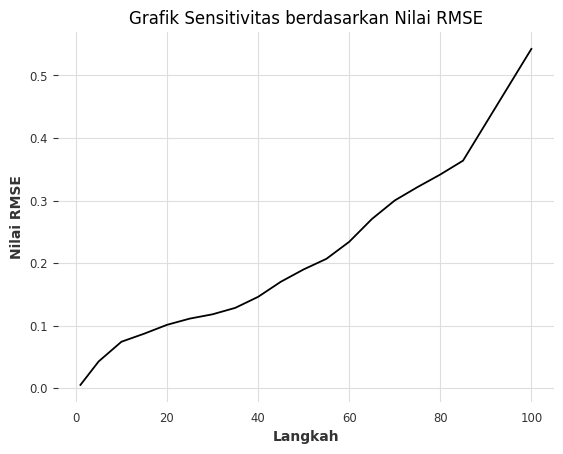

In [52]:
# plotting the points
plt.plot(LT, list_sen_rmse)


# naming the x axis
plt.xlabel('Langkah')
# naming the y axis
plt.ylabel('Nilai RMSE')

# giving a title to my graph
plt.title('Grafik Sensitivitas berdasarkan Nilai RMSE')

# function to show the plot
plt.show()

In [54]:
LT = [90,95]
list_sen_smape= []
list_sen_rmse = []

for l in LT :
  model, bestparams, bestMetric_ = VAR(train, VARIMA)

  model.fit(train)
  forecast_ = model.predict(l)
  smape_ = darts.metrics.smape(test, forecast_)
  list_sen_smape.append(smape_)
  rmse_ = darts.metrics.rmse(test, forecast_)
  list_sen_rmse.append(rmse_)

  del model

In [55]:
list_sen_smape

[70.01462312423251, 75.03434273342044]

In [56]:
list_sen_rmse

[0.3929887569461125, 0.4464969009611142]